In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
from mlxtend.plotting import plot_decision_regions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score, classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import permutation_importance
from mlxtend.plotting import plot_decision_regions

In [11]:
#!pip install mlxtend

In [2]:
# Load and merge datasets
data = pd.read_csv('data_a.csv', delimiter="\t")



# Display the merged data
#print(data.head())

data


,depth_level,stp_surface,surface_dip,hr,q,a,b,c,status
0,1025,HangingWall,71.538542,3.094170,0.9,1.0,0.21,6.1,Stable
1,1025,FootWall,90.000000,3.103156,1.5,1.0,0.20,8.0,Stable
2,1025,HangingWall,90.000000,2.441781,2.0,1.0,0.29,8.0,Stable
3,1025,FootWall,90.000000,2.419322,2.0,1.0,0.29,8.0,Stable
4,1025,FootWall,90.000000,3.903421,1.5,1.0,0.20,8.0,Stable
...,...,...,...,...,...,...,...,...,...
481,267,FootWall,90.000000,8.840000,2.7,1.0,0.80,8.0,Unstable
482,267,Back,90.000000,3.830000,4.7,1.0,1.00,1.0,Stable
483,267,VerticalEnd,90.000000,3.550000,4.7,1.0,1.00,8.0,Unstable
484,267,HangingWall,90.000000,8.840000,1.6,1.0,0.50,8.0,Unstable


Data Summary:
       depth_level  surface_dip          hr           q           a  \
count   486.000000   486.000000  486.000000  486.000000  486.000000   
mean    634.995885    80.160582    5.557037    3.693045    0.997469   
std     368.180357    18.291301    2.475044    2.487532    0.033669   
min      42.000000     0.000000    1.898810    0.100000    0.500000   
25%     242.000000    70.781220    3.903421    1.600000    1.000000   
50%     650.000000    90.000000    5.022809    3.440000    1.000000   
75%     875.000000    90.000000    6.494435    4.700000    1.000000   
max    1205.000000    91.910213   19.220000   20.000000    1.000000   

                b           c  
count  486.000000  486.000000  
mean     0.483292    6.256523  
std      0.294398    2.371865  
min      0.200000    1.000000  
25%      0.200000    5.700000  
50%      0.340000    8.000000  
75%      0.800000    8.000000  
max      1.000000    8.200000  

Missing Values:
depth_level    0
stp_surface    0
surface

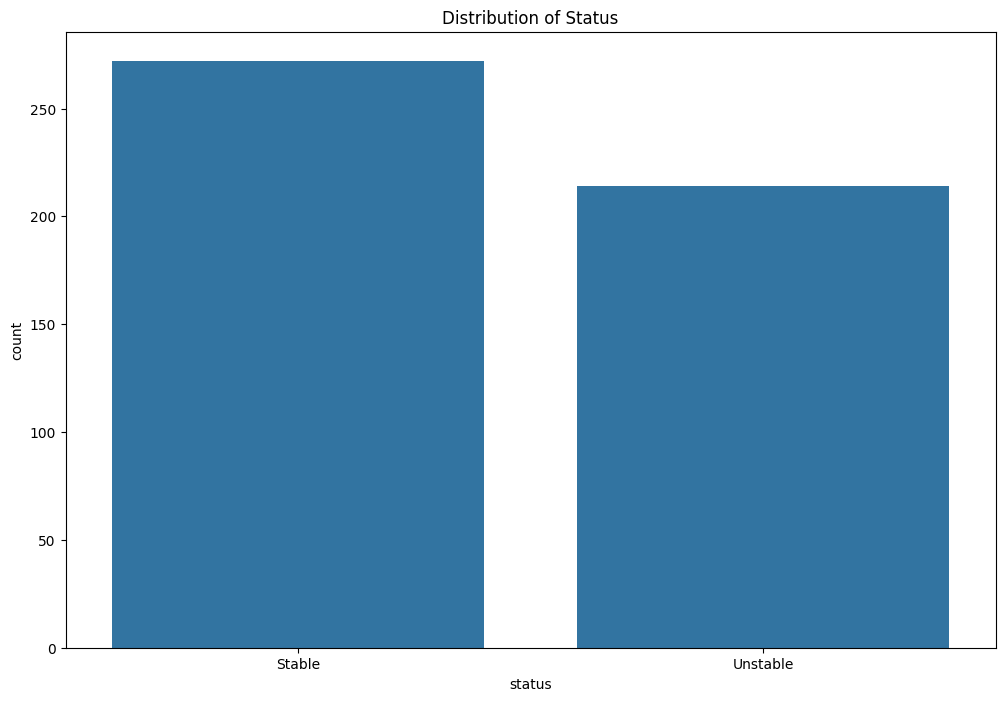

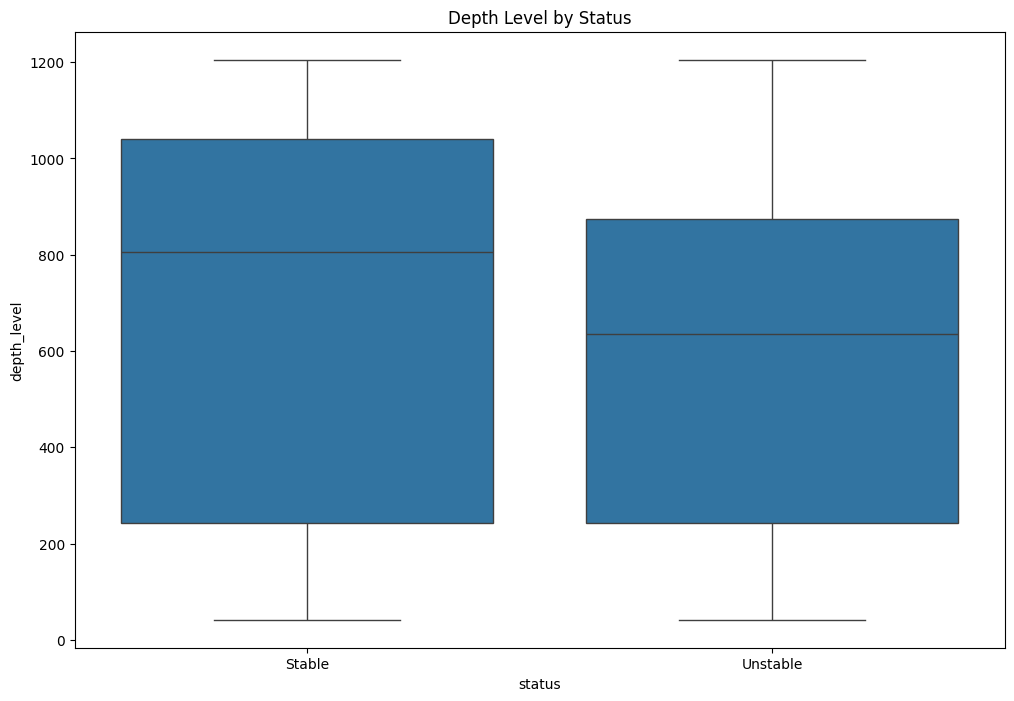

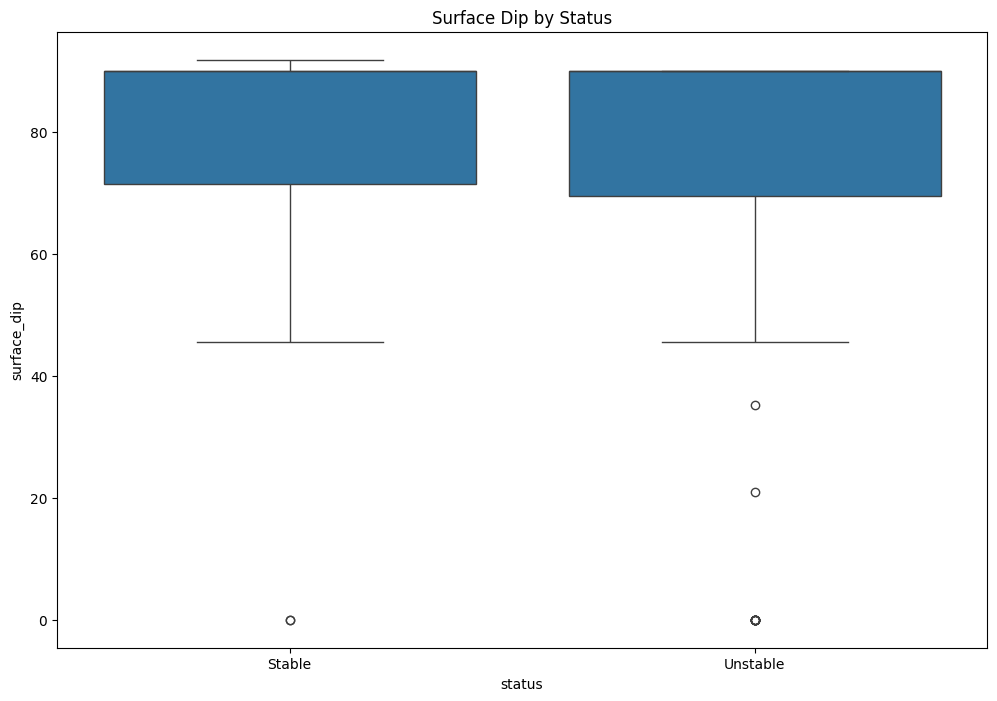

In [5]:
# Exploratory Data Analysis (EDA)
def eda(df):
    print("Data Summary:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nData Types:")
    print(df.dtypes)

    
    # Visualizations
    plt.figure(figsize=(12, 8))
    sns.countplot(x='status', data=df)
    plt.title('Distribution of Status')
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.boxplot(x='status', y='depth_level', data=df)
    plt.title('Depth Level by Status')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='status', y='surface_dip', data=df)
    plt.title('Surface Dip by Status')
    plt.show()

eda(data)


In [24]:
# Data Cleaning
data.dropna(inplace=True)

# Feature Engineering
label_encoders = {}
for column in ['stp_surface', 'status']:
    if column in data.columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le


# Create new feature 'n'
data['n'] = data['q'] * data['a'] * data['b'] * data['c']

# Check for duplicates and drop them
print("Number of duplicates:", data.duplicated().sum())
data = data.drop_duplicates()

data


C:\Users\bless\AppData\Local\Temp\ipykernel_11308\190323146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\bless\AppData\Local\Temp\ipykernel_11308\190323146.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = le.fit_transform(data[column])
C:\Users\bless\AppData\Local\Temp\ipykernel_11308\190323146.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Number of duplicates: 0


,depth_level,stp_surface,surface_dip,hr,q,a,b,c,status,n
0,1025,2,71.538542,3.094170,0.9,1.0,0.21,6.1,0,1.1529
1,1025,1,90.000000,3.103156,1.5,1.0,0.20,8.0,0,2.4000
2,1025,2,90.000000,2.441781,2.0,1.0,0.29,8.0,0,4.6400
3,1025,1,90.000000,2.419322,2.0,1.0,0.29,8.0,0,4.6400
4,1025,1,90.000000,3.903421,1.5,1.0,0.20,8.0,0,2.4000
...,...,...,...,...,...,...,...,...,...,...
479,267,5,90.000000,2.640000,4.7,1.0,1.00,8.0,0,37.6000
480,267,2,90.000000,8.840000,1.6,1.0,0.50,8.0,1,6.4000
481,267,1,90.000000,8.840000,2.7,1.0,0.80,8.0,1,17.2800
482,267,0,90.000000,3.830000,4.7,1.0,1.00,1.0,0,4.7000


In [15]:
# Features and target variable
features = ['hr', 'n', 'surface_dip']
X = data[features]
y = data['status']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 374
Testing set size: 94


In [16]:
# Convert y_train and y_test to NumPy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Base models
base_models = [
    ('gpc', GaussianProcessClassifier()),
    ('svc', SVC(probability=True)),
    ('rfc', RandomForestClassifier()),
    ('gbc', GradientBoostingClassifier()),
    ('qda', QuadraticDiscriminantAnalysis()),
    ('lda', LinearDiscriminantAnalysis()),
    ('knc', KNeighborsClassifier()), 
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

In [17]:
# Function to evaluate each model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Kappa Coefficient: {kappa:.2f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", conf_matrix)

   # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['status'].classes_, yticklabels=label_encoders['status'].classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

    if X_train.shape[1] > 1:
        plt.figure(figsize=(12, 8))
        try:
            plot_decision_regions(X_train[:, :2], y_train, clf=model, legend=2)
            plt.title(f'Decision Regions for {model.__class__.__name__} (hr vs surface_dip)')
            plt.xlabel('hr')
            plt.ylabel('surface_dip')
            plt.show()
        except Exception as e:
            print(f"Error plotting decision regions for {model.__class__.__name__}: {e}")

Model: GaussianProcessClassifier
Accuracy: 0.73
Kappa Coefficient: 0.45

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        53
           1       0.71      0.66      0.68        41

    accuracy                           0.73        94
   macro avg       0.73      0.73      0.73        94
weighted avg       0.73      0.73      0.73        94


Confusion Matrix:
 [[42 11]
 [14 27]]


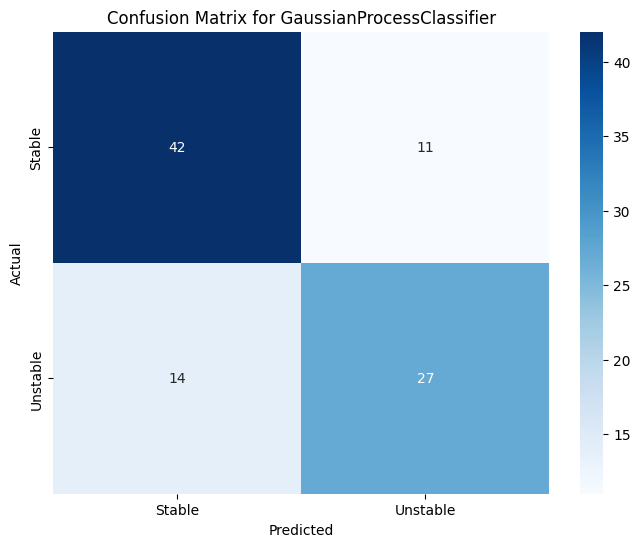

Error plotting decision regions for GaussianProcessClassifier: X has 2 features, but GaussianProcessClassifier is expecting 3 features as input.
Model: SVC
Accuracy: 0.74
Kappa Coefficient: 0.47

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.79        53
           1       0.74      0.63      0.68        41

    accuracy                           0.74        94
   macro avg       0.74      0.73      0.73        94
weighted avg       0.74      0.74      0.74        94


Confusion Matrix:
 [[44  9]
 [15 26]]


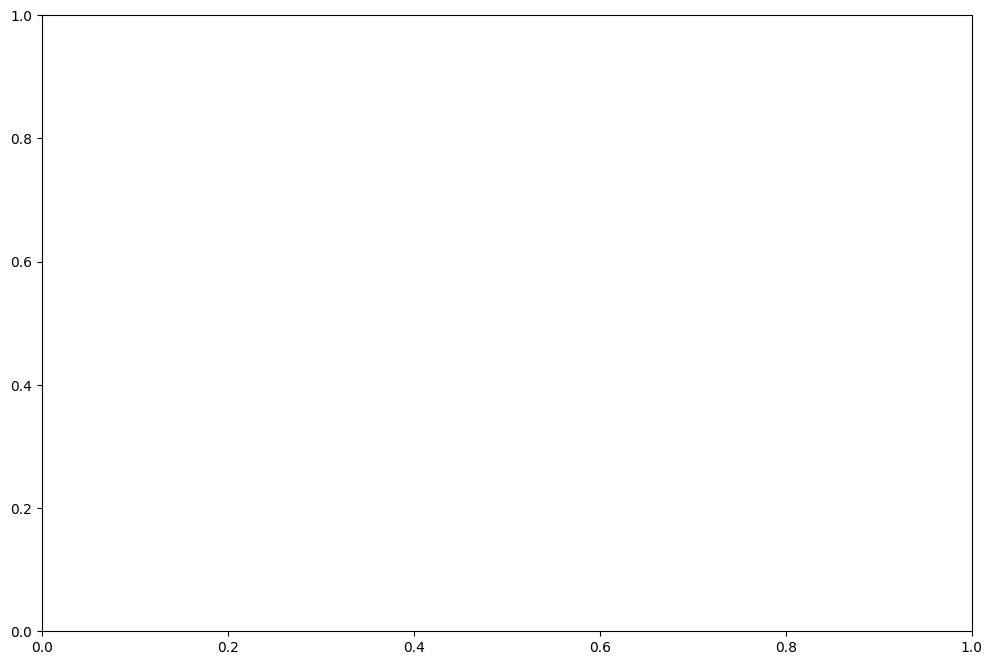

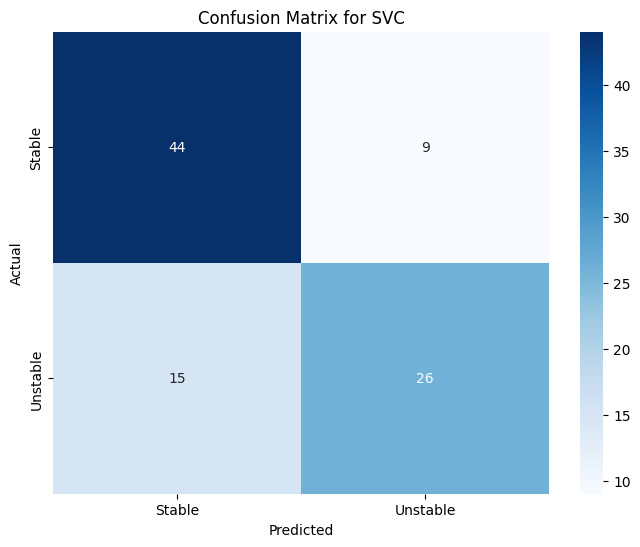

Error plotting decision regions for SVC: X has 2 features, but SVC is expecting 3 features as input.
Model: RandomForestClassifier
Accuracy: 0.85
Kappa Coefficient: 0.70

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        53
           1       0.83      0.83      0.83        41

    accuracy                           0.85        94
   macro avg       0.85      0.85      0.85        94
weighted avg       0.85      0.85      0.85        94


Confusion Matrix:
 [[46  7]
 [ 7 34]]


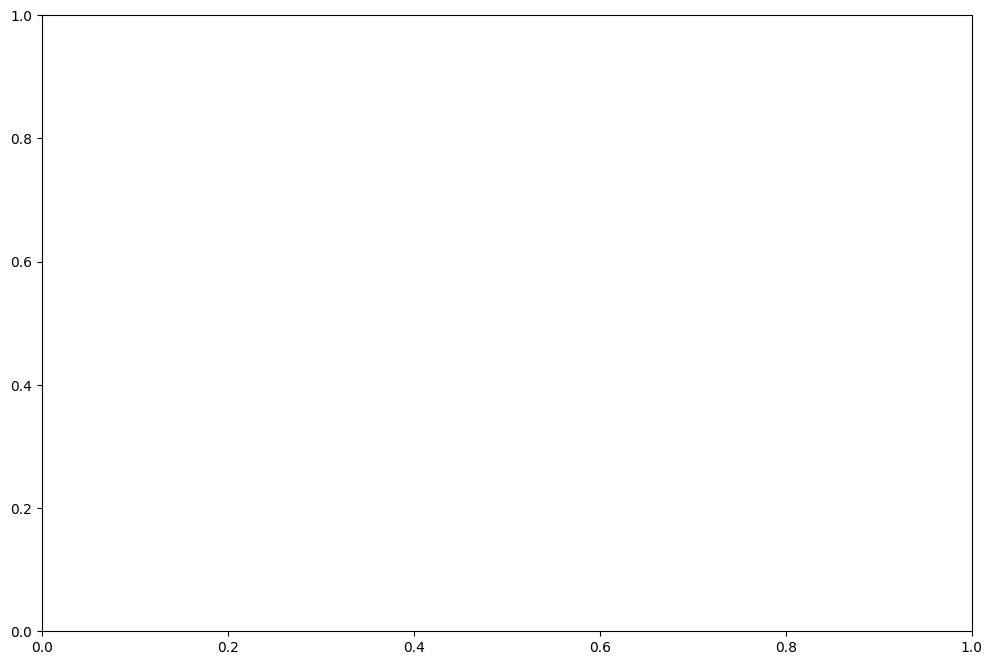

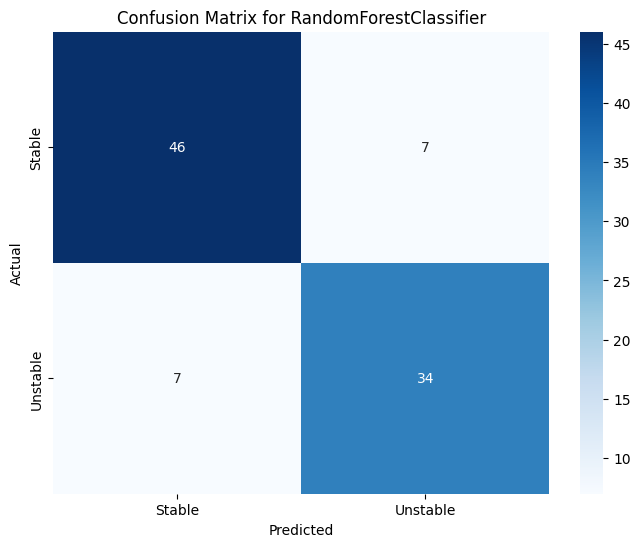

Error plotting decision regions for RandomForestClassifier: X has 2 features, but RandomForestClassifier is expecting 3 features as input.
Model: GradientBoostingClassifier
Accuracy: 0.81
Kappa Coefficient: 0.61

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83        53
           1       0.77      0.80      0.79        41

    accuracy                           0.81        94
   macro avg       0.81      0.81      0.81        94
weighted avg       0.81      0.81      0.81        94


Confusion Matrix:
 [[43 10]
 [ 8 33]]


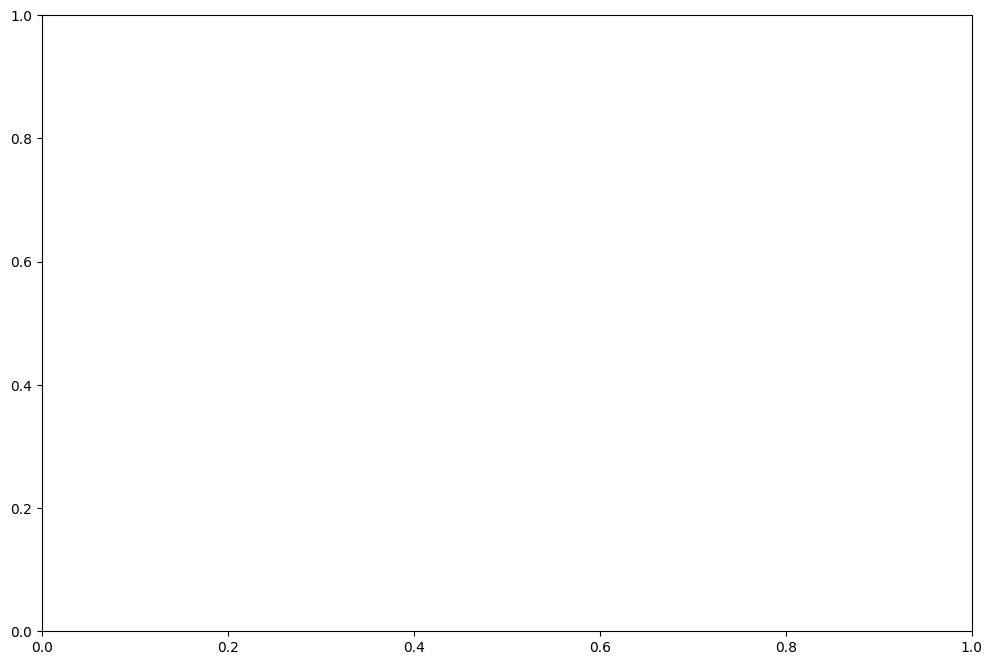

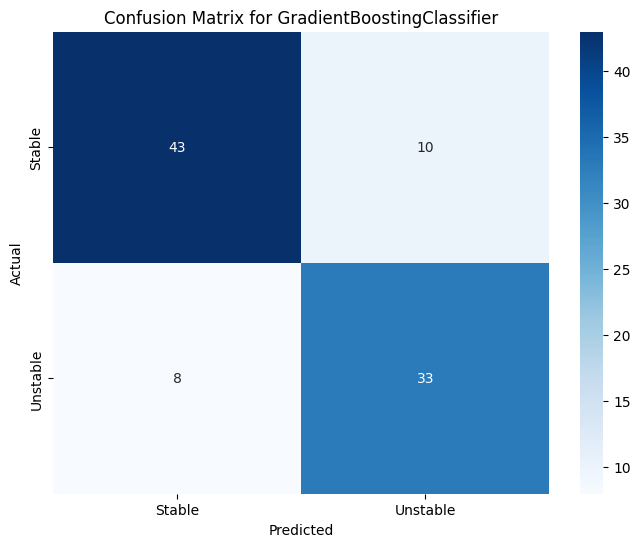

Error plotting decision regions for GradientBoostingClassifier: X has 2 features, but GradientBoostingClassifier is expecting 3 features as input.
Model: QuadraticDiscriminantAnalysis
Accuracy: 0.69
Kappa Coefficient: 0.36

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.81      0.75        53
           1       0.69      0.54      0.60        41

    accuracy                           0.69        94
   macro avg       0.69      0.67      0.68        94
weighted avg       0.69      0.69      0.68        94


Confusion Matrix:
 [[43 10]
 [19 22]]


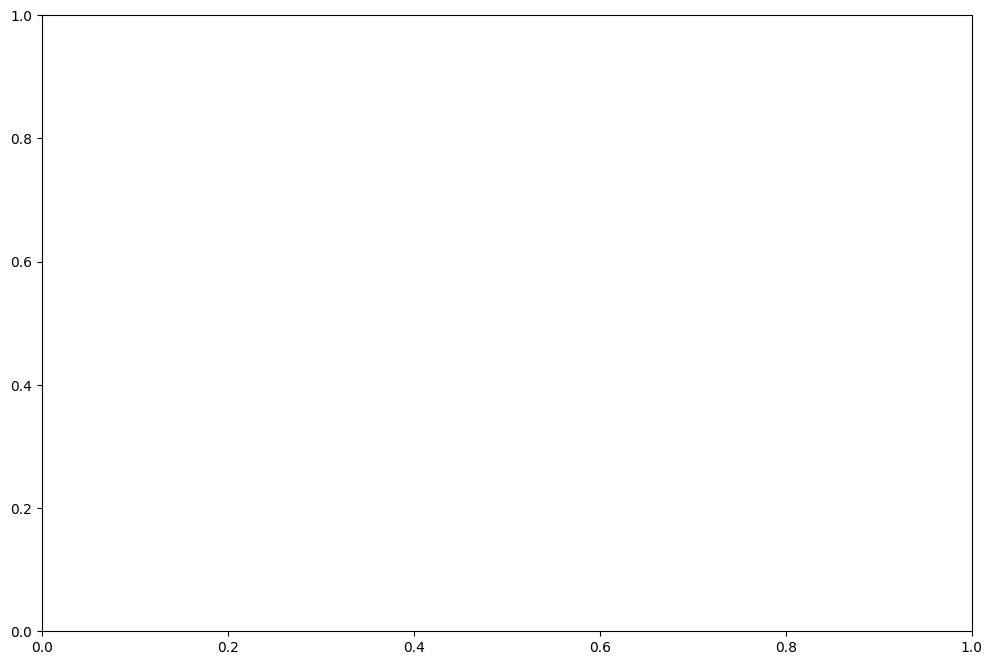

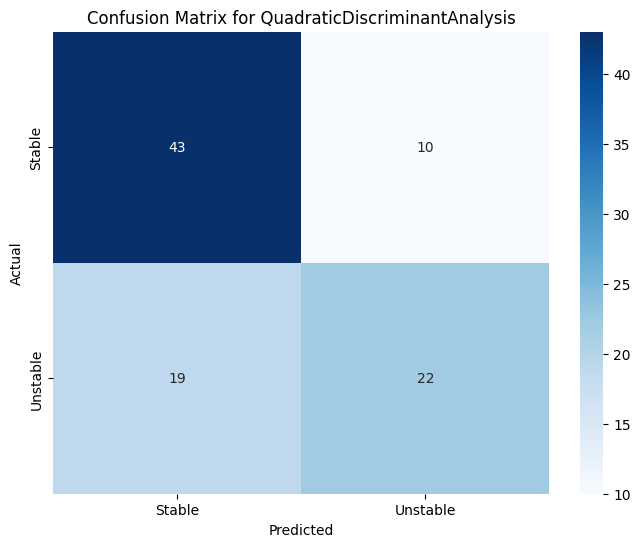

Error plotting decision regions for QuadraticDiscriminantAnalysis: X has 2 features, but QuadraticDiscriminantAnalysis is expecting 3 features as input.
Model: LinearDiscriminantAnalysis
Accuracy: 0.68
Kappa Coefficient: 0.34

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.79      0.74        53
           1       0.67      0.54      0.59        41

    accuracy                           0.68        94
   macro avg       0.68      0.66      0.67        94
weighted avg       0.68      0.68      0.67        94


Confusion Matrix:
 [[42 11]
 [19 22]]


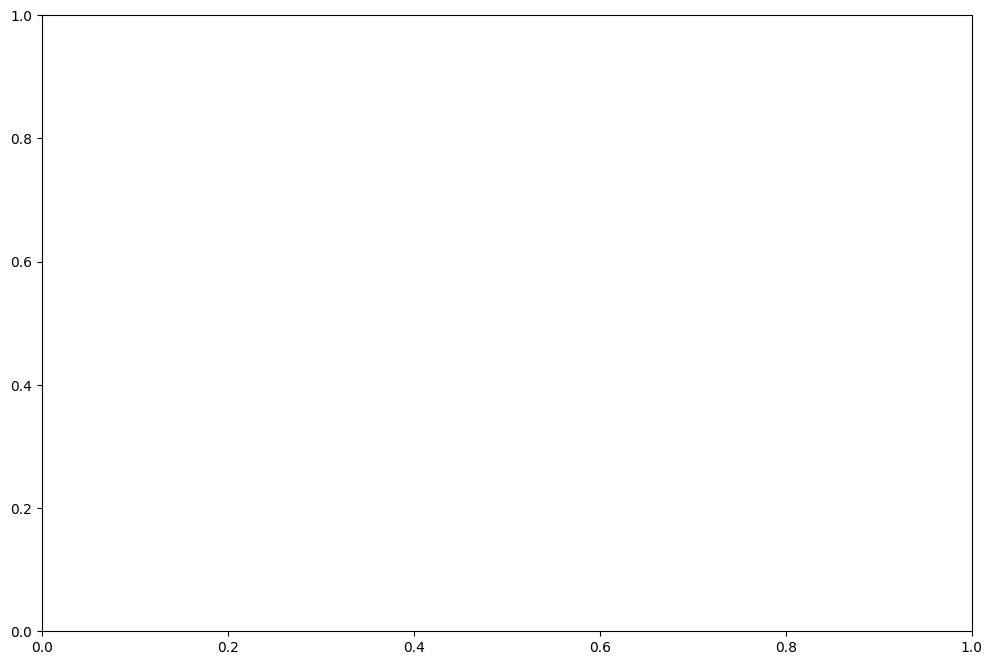

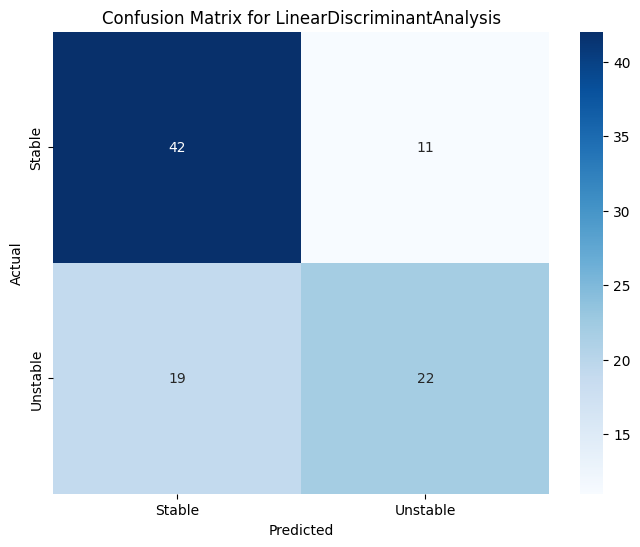

Error plotting decision regions for LinearDiscriminantAnalysis: X has 2 features, but LinearDiscriminantAnalysis is expecting 3 features as input.
Model: KNeighborsClassifier
Accuracy: 0.83
Kappa Coefficient: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        53
           1       0.82      0.78      0.80        41

    accuracy                           0.83        94
   macro avg       0.83      0.82      0.83        94
weighted avg       0.83      0.83      0.83        94


Confusion Matrix:
 [[46  7]
 [ 9 32]]


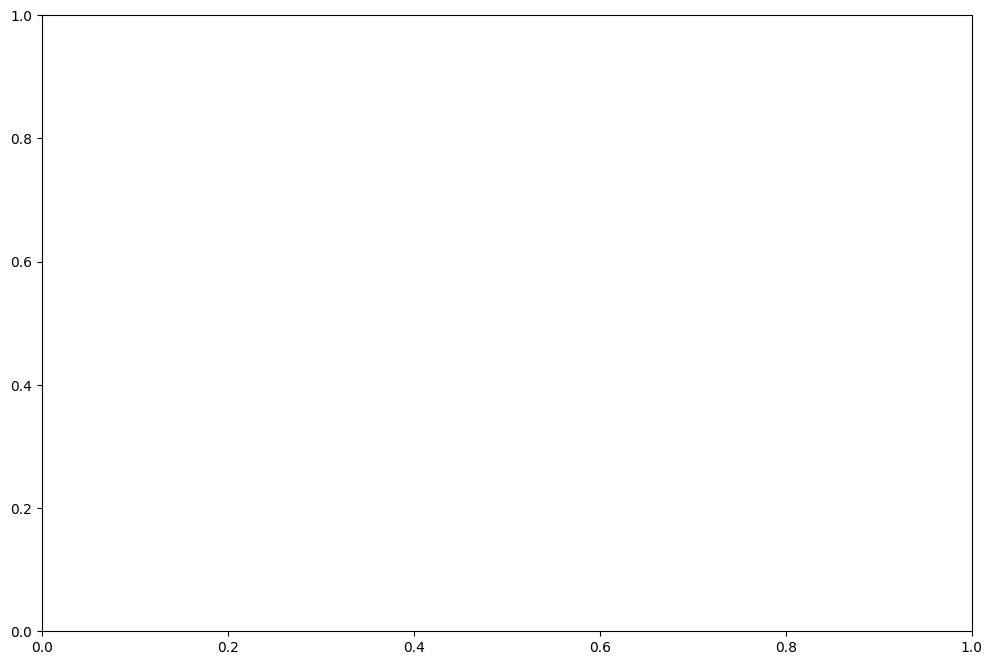

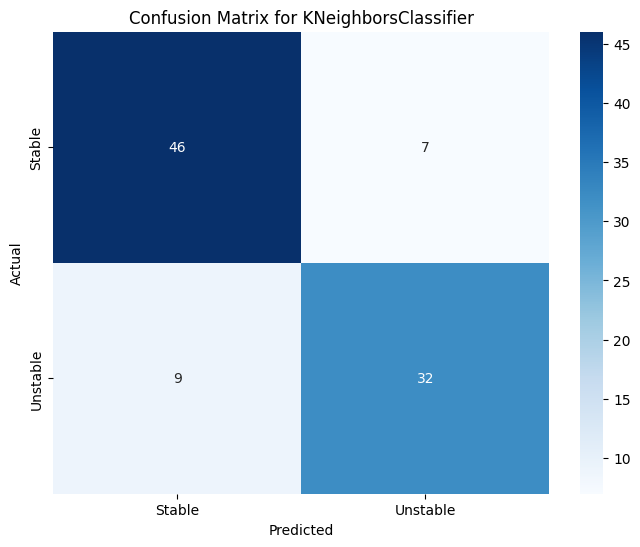

Error plotting decision regions for KNeighborsClassifier: X has 2 features, but KNeighborsClassifier is expecting 3 features as input.
Model: XGBClassifier
Accuracy: 0.82
Kappa Coefficient: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83        53
           1       0.77      0.83      0.80        41

    accuracy                           0.82        94
   macro avg       0.82      0.82      0.82        94
weighted avg       0.82      0.82      0.82        94


Confusion Matrix:
 [[43 10]
 [ 7 34]]


C:\Users\bless\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [10:51:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


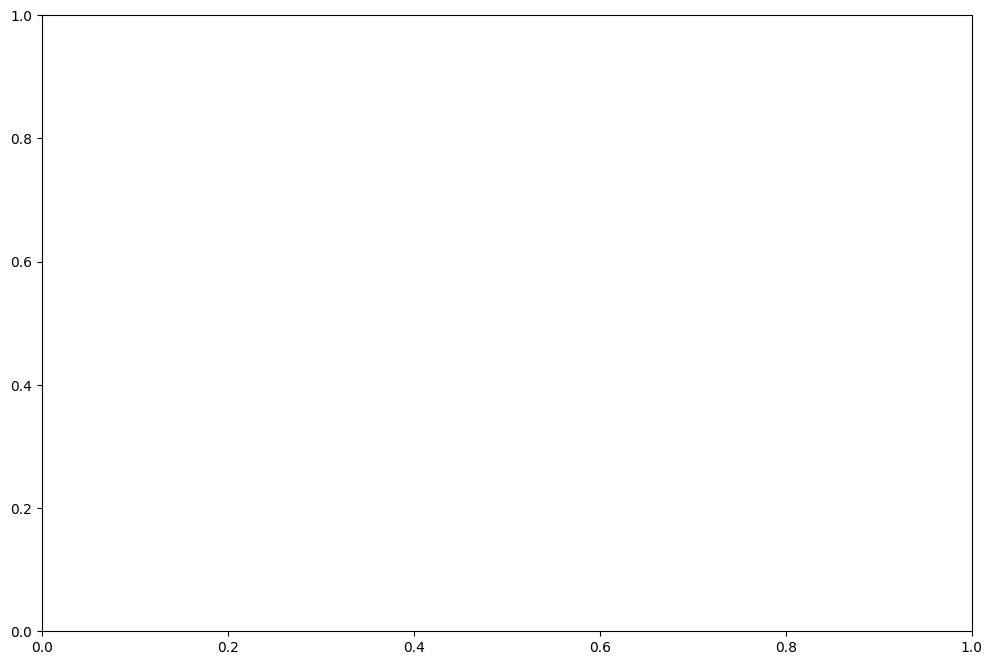

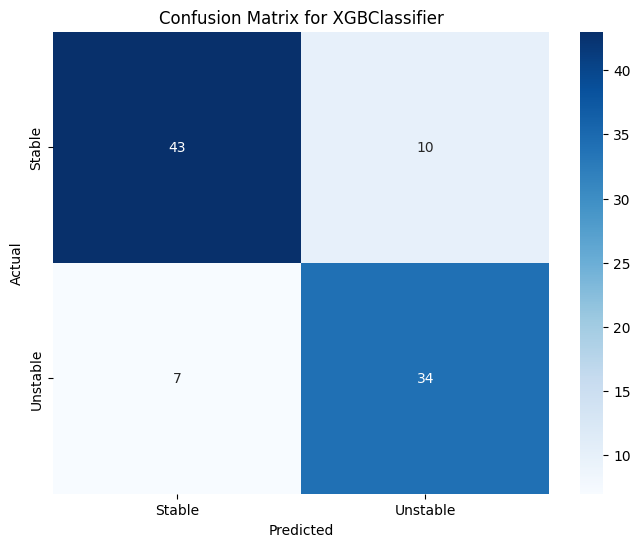

Error plotting decision regions for XGBClassifier: Feature shape mismatch, expected: 3, got 2


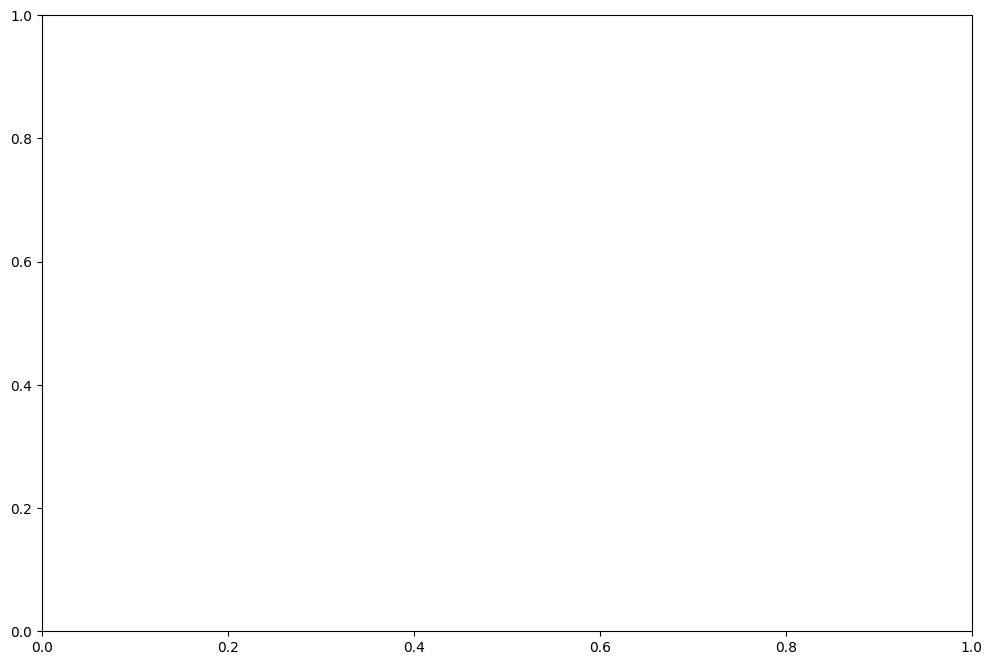

In [18]:
# Evaluate each base model
for name, model in base_models:
    evaluate_model(model, X_train, y_train, X_test, y_test)

In [19]:
# Meta model
meta_model = LogisticRegression()

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

In [20]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'gpc__max_iter_predict': [100, 200],
    'svc__C': [0.1, 1, 10],
    'rfc__n_estimators': [50, 100],
    'gbc__n_estimators': [50, 100],
    'knc__n_neighbors': [3, 5],
    'xgb__n_estimators': [50, 100]
}

grid_search = GridSearchCV(stacking_clf, param_grid, cv=5, scoring='accuracy')  # Use f1_weighted for imbalanced datasets
grid_search.fit(X_train, y_train)

C:\Users\bless\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [10:51:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\bless\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [10:51:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\bless\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [10:51:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg,

GridSearchCV(cv=5,
             estimator=StackingClassifier(cv=5,
                                          estimators=[('gpc',
                                                       GaussianProcessClassifier()),
                                                      ('svc',
                                                       SVC(probability=True)),
                                                      ('rfc',
                                                       RandomForestClassifier()),
                                                      ('gbc',
                                                       GradientBoostingClassifier()),
                                                      ('qda',
                                                       QuadraticDiscriminantAnalysis()),
                                                      ('lda',
                                                       LinearDiscriminantAnalysis()),
                                                      ('knc',
                                                       KNeighborsClassifier()),
                                                      ('xgb',
                                                       XGBClassifier(base_score=None,
                                                                     boost...
                                                                     monotone_constraints=None,
                                                                     multi_strategy=None,
                                                                     n_estimators=None,
                                                                     n_jobs=None,
                                                                     num_parallel_tree=None,
                                                                     random_state=None, ...))],
                                          final_estimator=LogisticRegression()),
             param_grid={'gbc__n_estimators': [50, 100],
                         'gpc__max_iter_predict': [100, 200],
                         'knc__n_neighbors': [3, 5],
                         'rfc__n_estimators': [50, 100], 'svc__C': [0.1, 1, 10],
                         'xgb__n_estimators': [50, 100]},
             scoring='accuracy')

In [21]:
# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Predictions on test set
y_pred = grid_search.predict(X_test)

Best parameters found:  {'gbc__n_estimators': 100, 'gpc__max_iter_predict': 100, 'knc__n_neighbors': 3, 'rfc__n_estimators': 50, 'svc__C': 10, 'xgb__n_estimators': 100}
Best cross-validation score: 0.83


Test set accuracy: 0.86
Kappa Coefficient: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88        53
           1       0.83      0.85      0.84        41

    accuracy                           0.86        94
   macro avg       0.86      0.86      0.86        94
weighted avg       0.86      0.86      0.86        94



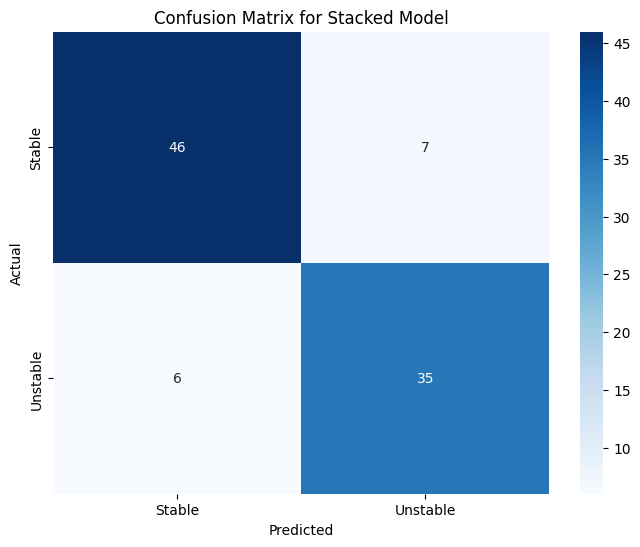

In [22]:
# Model Evaluation
print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Kappa Coefficient: {:.2f}".format(cohen_kappa_score(y_test, y_pred)))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for Stacked Model
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['status'].classes_, yticklabels=label_encoders['status'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stacked Model')
plt.show()

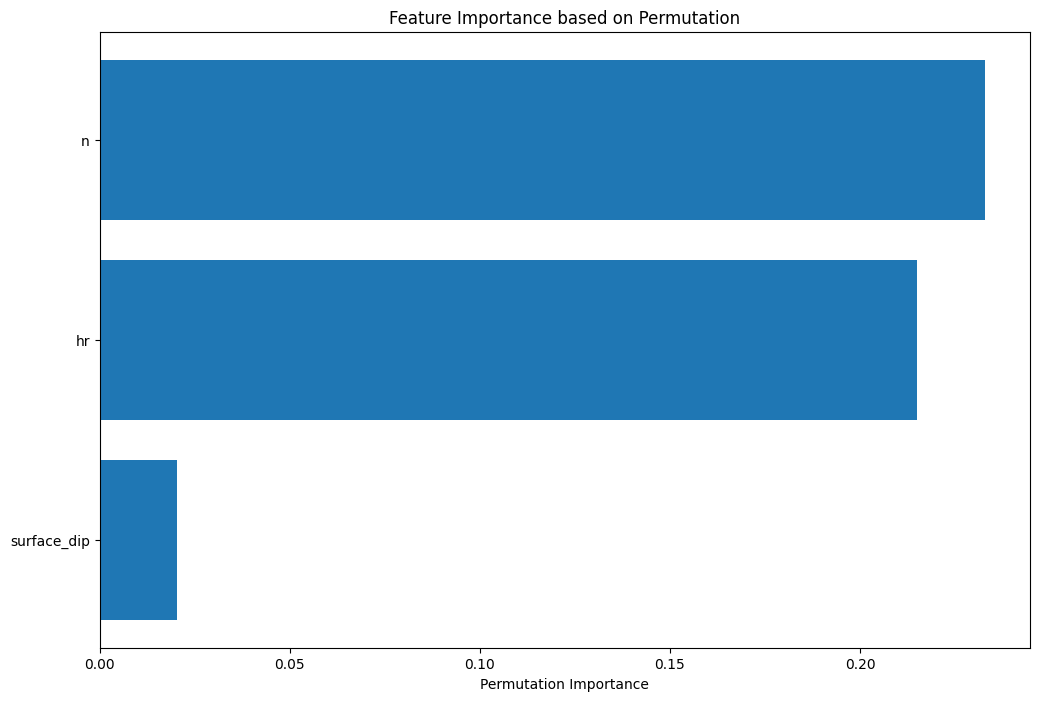

In [23]:
# Sensitivity Analysis
result = permutation_importance(grid_search, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
feature_names = X.columns
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(12, 8))
plt.barh(feature_names[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance based on Permutation")
plt.show()